# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | childress
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | fort bragg
Processing Record 4 of Set 1 | den burg
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | la ronge
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | cadale
Processing Record 10 of Set 1 | labrador city
Processing Record 11 of Set 1 | phibun mangsahan
Processing Record 12 of Set 1 | penhalonga
Processing Record 13 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | alappuzha
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | vadso
Processing Record 21 of Set 1 | thompson
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,childress,34.4264,-100.2040,295.29,83,0,7.20,US,1714106003
1,grytviken,-54.2811,-36.5092,274.72,81,23,2.60,GS,1714106174
2,fort bragg,35.1390,-79.0060,291.23,67,0,4.63,US,1714106212
3,den burg,53.0542,4.7972,279.25,87,100,4.12,NL,1714106212
4,port mathurin,-19.6833,63.4167,299.74,76,17,6.42,MU,1714106167


In [6]:

# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,childress,34.4264,-100.2040,295.29,83,0,7.20,US,1714106003
1,grytviken,-54.2811,-36.5092,274.72,81,23,2.60,GS,1714106174
2,fort bragg,35.1390,-79.0060,291.23,67,0,4.63,US,1714106212
3,den burg,53.0542,4.7972,279.25,87,100,4.12,NL,1714106212
4,port mathurin,-19.6833,63.4167,299.74,76,17,6.42,MU,1714106167


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

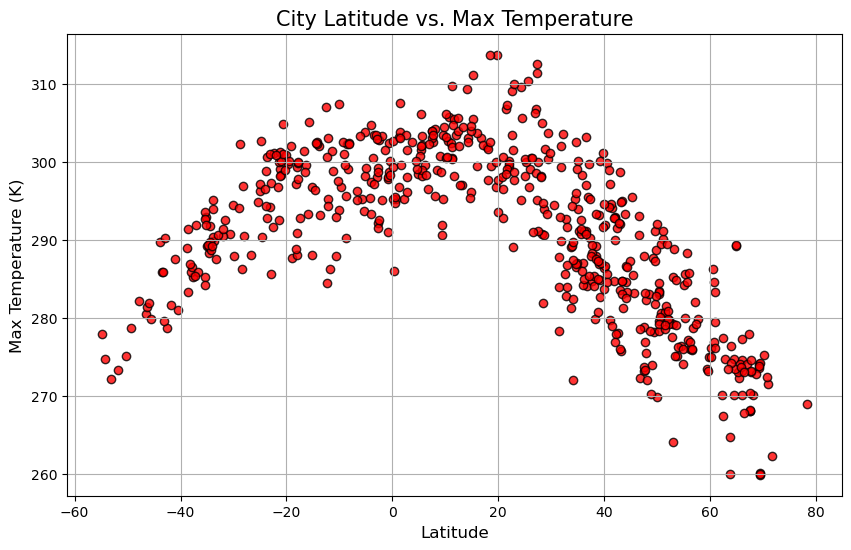

In [8]:
# Function to create scatter plots
def create_scatter_plot(data, x_column, y_column, title, y_label, file_name, color):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], data[y_column], color=color, edgecolor="black", linewidth=1, alpha=0.8)
    plt.title(title, fontsize=15)
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True)
    plt.savefig(f"../output_data/{file_name}")
    plt.show()

#function call
create_scatter_plot(city_data_df, 'Lat', 'Max Temp', 'City Latitude vs. Max Temperature', 'Max Temperature (K)', 'Fig1.png', 'red')


#### Latitude Vs. Humidity

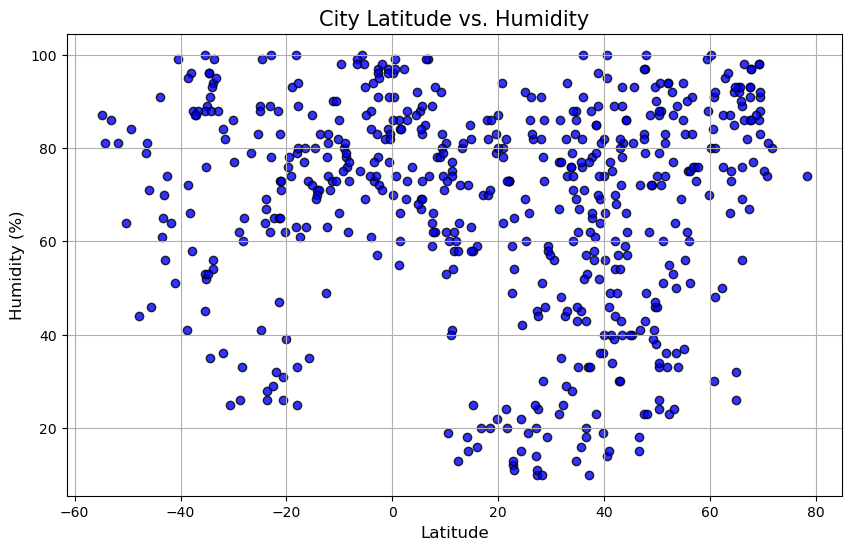

In [9]:
# Scatter plot for Latitude vs. Humidity
create_scatter_plot(city_data_df, 'Lat', 'Humidity', 'City Latitude vs. Humidity', 'Humidity (%)', 'Fig2.png', 'blue')

#### Latitude Vs. Cloudiness

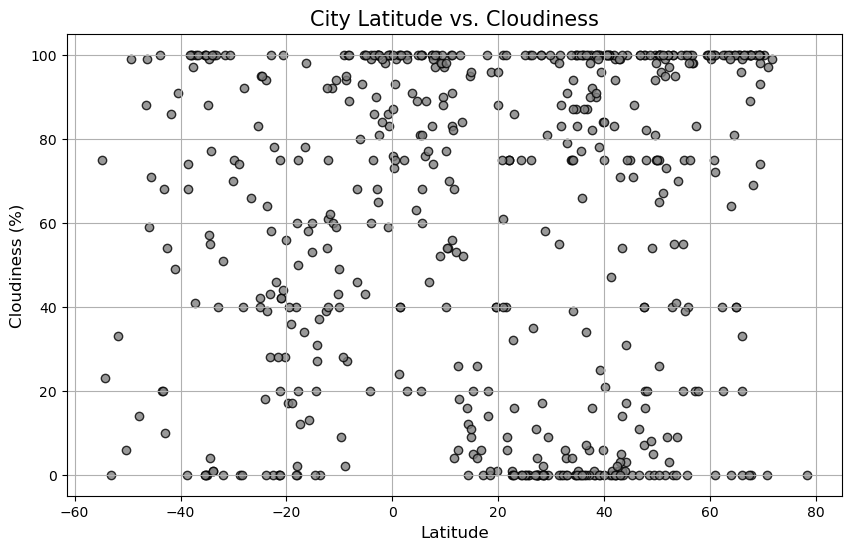

In [10]:
# Scatter plot for Latitude vs. Cloudiness
create_scatter_plot(city_data_df, 'Lat', 'Cloudiness', 'City Latitude vs. Cloudiness', 'Cloudiness (%)', 'Fig3.png', 'gray')


#### Latitude vs. Wind Speed Plot

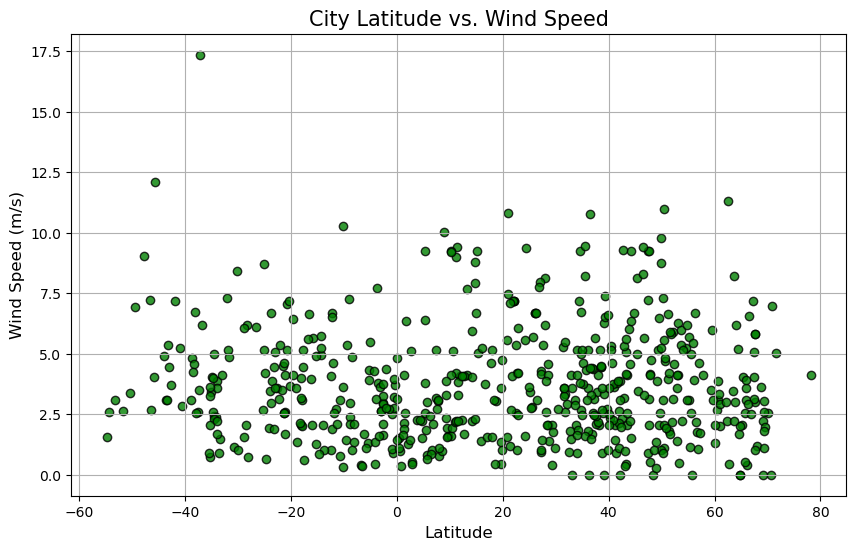

In [11]:
# Scatter plot for Latitude vs. Wind Speed
create_scatter_plot(city_data_df, 'Lat', 'Wind Speed', 'City Latitude vs. Wind Speed', 'Wind Speed (m/s)', 'Fig4.png', 'green')


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def compute_linear_regression(x_values, y_values):
    """
    Calculate linear regression parameters.
    
    Args:
    x_values: Data for the x-axis.
    y_values: Data for the y-axis.

    Returns:
    The slope, intercept, and r-squared value of the regression line.
    """
    # Calculate linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    r_squared = r_value**2  # Calculate the coefficient of determination
    return slope, intercept, r_squared

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_eq_coords, slope, intercept):
    """
    Generate a scatter plot with a linear regression line.
    
    Args:
    x_values: Data for the x-axis.
    y_values: Data for the y-axis.
    title: Title of the plot.
    xlabel: Label for the x-axis.
    ylabel: Label for the y-axis.
    line_eq_coords: Coordinates (x, y) to annotate the linear regression equation on the plot.
    slope: Slope of the regression line.
    intercept: Intercept of the regression line.
    """
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot
    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values, color='blue')  # Scatter plot points in blue
    plt.plot(x_values, regress_values, color='red')  # Regression line in red
    plt.annotate(line_eq, line_eq_coords, fontsize=15, color="red")  # Annotate the line equation in red
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,childress,34.4264,-100.2040,295.29,83,0,7.20,US,1714106003
2,fort bragg,35.1390,-79.0060,291.23,67,0,4.63,US,1714106212
3,den burg,53.0542,4.7972,279.25,87,100,4.12,NL,1714106212
6,la ronge,55.1001,-105.2842,284.29,37,75,3.09,CA,1714106159
8,cadale,2.7603,46.3222,301.57,73,100,5.12,SO,1714106214


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,274.72,81,23,2.60,GS,1714106174
4,port mathurin,-19.6833,63.4167,299.74,76,17,6.42,MU,1714106167
5,puerto ayora,-0.7393,-90.3518,297.90,97,59,0.89,EC,1714105877
7,adamstown,-25.0660,-130.1015,296.35,89,42,8.69,PN,1714106137
11,penhalonga,-18.8911,32.6978,287.77,93,17,1.35,ZW,1714106215


###  Temperature vs. Latitude Linear Regression Plot

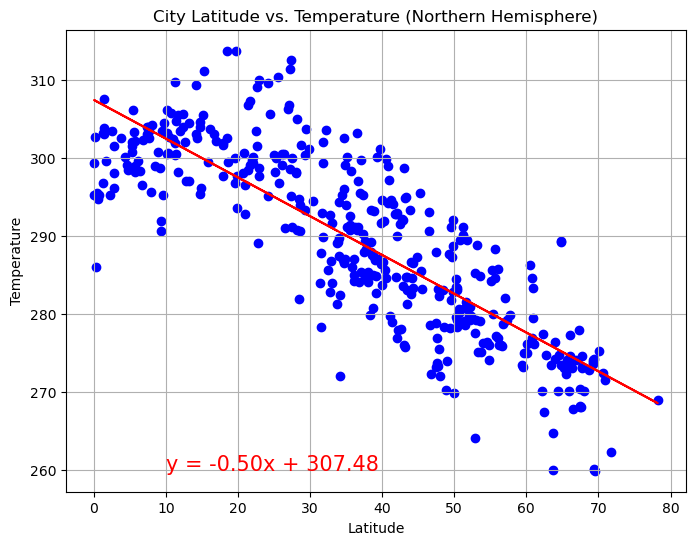

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Plot parameters
title = "City Latitude vs. Temperature (Northern Hemisphere)"
xlabel = "Latitude"
ylabel = "Temperature"
line_eq_coords = (10, 260)  # Adjust these coordinates based on your data range
slope, intercept, r_squared = compute_linear_regression(x_values, y_values)
# Call the function
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_eq_coords, slope, intercept)

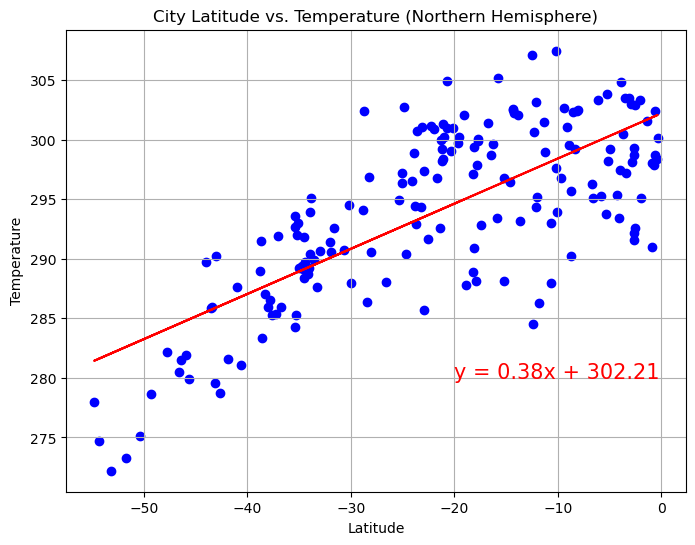

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Plot parameters
title = "City Latitude vs. Temperature (Northern Hemisphere)"
xlabel = "Latitude"
ylabel = "Temperature"
line_eq_coords = (-20, 280)  # Adjust these coordinates based on your data range

slope, intercept, r_squared = compute_linear_regression(x_values, y_values)
# Call the function
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_eq_coords, slope, intercept)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

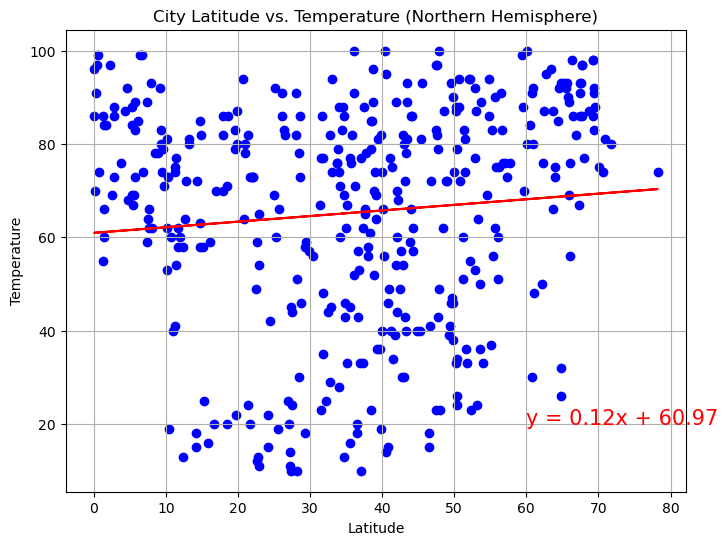

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Humidity"]

# Plot parameters
title = "City Latitude vs. Temperature (Northern Hemisphere)"
xlabel = "Latitude"
ylabel = "Temperature"
line_eq_coords = (60, 20)  # Adjust these coordinates based on your data range

# Call the function
slope, intercept, r_squared = compute_linear_regression(x_values, y_values)
# Call the function
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_eq_coords, slope, intercept)

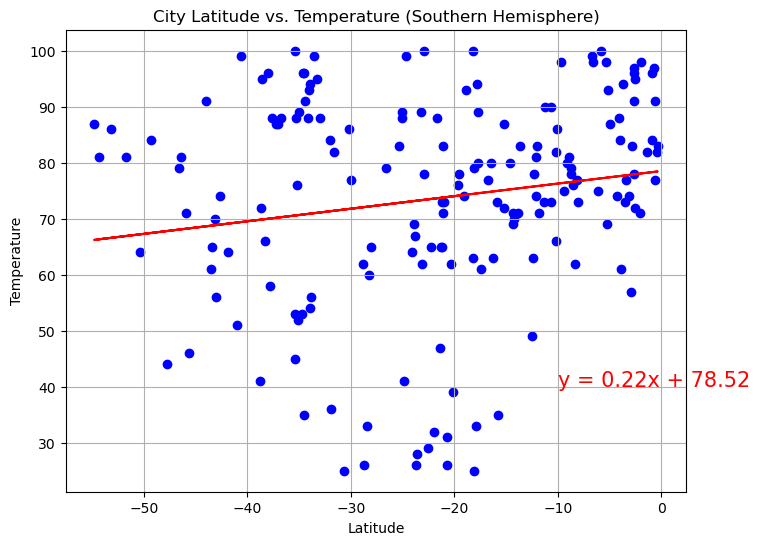

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Humidity"]

# Plot parameters
title = "City Latitude vs. Temperature (Southern Hemisphere)"
xlabel = "Latitude"
ylabel = "Temperature"
line_eq_coords = (-10, 40)  # Adjust these coordinates based on your data range

# Call the function
slope, intercept, r_squared = compute_linear_regression(x_values, y_values)
# Call the function
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_eq_coords, slope, intercept)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

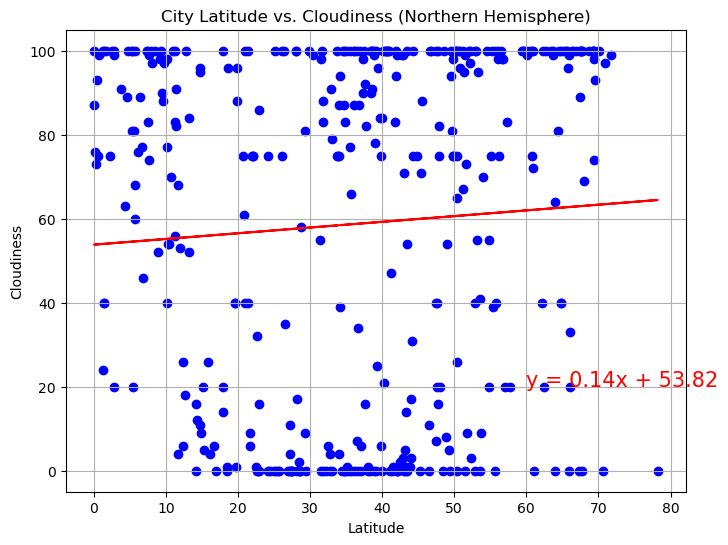

In [23]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Cloudiness"]

# Plot parameters
title = "City Latitude vs. Cloudiness (Northern Hemisphere)"
xlabel = "Latitude"
ylabel = "Cloudiness"
line_eq_coords = (60, 20)  # Adjust these coordinates based on your data range

# Call the function
slope, intercept, r_squared = compute_linear_regression(x_values, y_values)
# Call the function
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_eq_coords, slope, intercept)

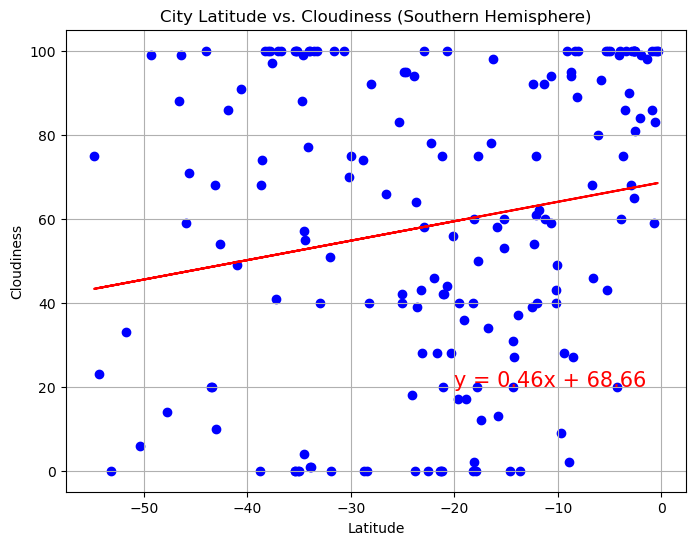

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Cloudiness"]

# Plot parameters
title = "City Latitude vs. Cloudiness (Southern Hemisphere)"
xlabel = "Latitude"
ylabel = "Cloudiness"
line_eq_coords = (-20, 20)  # Adjust these coordinates based on your data range

# Call the function
slope, intercept, r_squared = compute_linear_regression(x_values, y_values)
# Call the function
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_eq_coords, slope, intercept)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

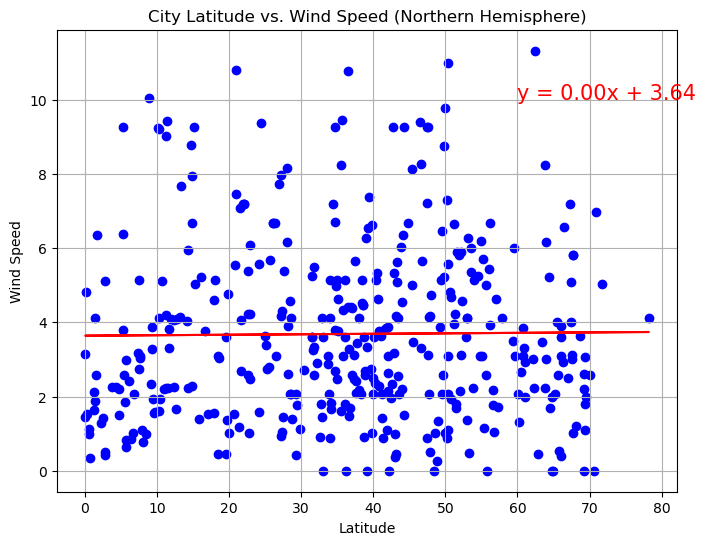

This the r value0.00010560808612786417


In [29]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Wind Speed"]

# Plot parameters
title = "City Latitude vs. Wind Speed (Northern Hemisphere)"
xlabel = "Latitude"
ylabel = "Wind Speed"
line_eq_coords = (60, 10)  # Adjust these coordinates based on your data range

# Call the function
slope, intercept, r_squared = compute_linear_regression(x_values, y_values)
# Call the function
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_eq_coords, slope, intercept)
print(f"This the r value{r_squared}")

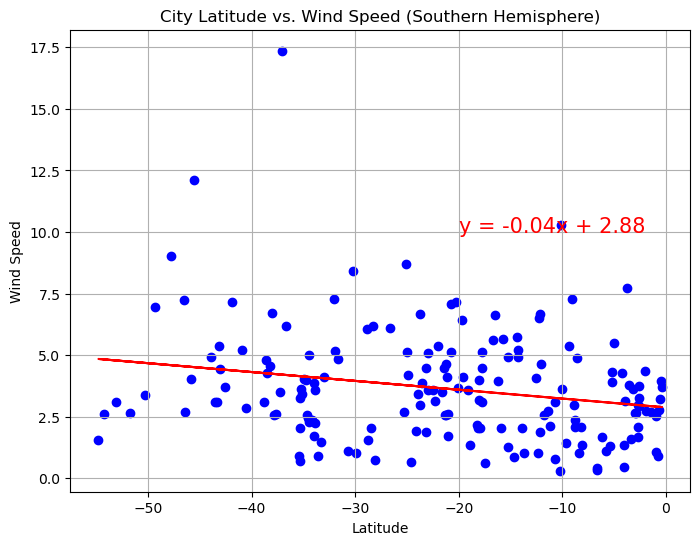

This the r value0.04913480501681642


In [27]:
# Southern Hemisphere
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Wind Speed"]

# Plot parameters
title = "City Latitude vs. Wind Speed (Southern Hemisphere)"
xlabel = "Latitude"
ylabel = "Wind Speed"
line_eq_coords = (-20, 10)  # Adjust these coordinates based on your data range

# Call the function
slope, intercept, r_squared = compute_linear_regression(x_values, y_values)
# Call the function
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, line_eq_coords, slope, intercept)
print(f"This the r value{r_squared}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE